# Python Practical Design <font size=4>© Enos Chou</font>

<b>Cases</b><br>
<ol>
    <li><a href="#api">Open Data API Integration</a></li>
    <li><a href="#cra">Basic Crawler Integration</a></li>
    <li><a href="#int">Integrity Consideration</a></li>
    <li><a href="#mod">Modularization for Delivery</a></li>
    <li><a href="#opt">Optimize Function Design to Improve Performance</a></li>
    <li><a href="#par">Parallel Run to Improve Performance</a></li>
    <li><a href="#fri">Friendly Query</a></li>
    <li><a href="#wlb">Weather LINE Bot</a></li>
    <li><a href="#wap">Weather API</a></li>
    <li><a href="#con">Configurable Code Design</a></li>
</ol>

<div style="page-break-before: always;"></div>

## <div id="api"><font color="blue">1. Open Data API Integration</font></div>

### <font color="brown">以中央氣象署之 Open Data API 實做查詢即時天氣模組</font>

<b>SPEC</b>

<tt>
def grab(site):<br>
&nbsp;&nbsp;&nbsp; ...<br>
&nbsp;&nbsp;&nbsp; return {'S': '臺北',<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 'T': 25.3,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 'H': 0.53,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 'R': 0.5,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 'O': '2024-08-02...'}<br>
</tt>

<b>Reference Output</b>

<tt>
print(grab('臺北'))<br>
<br>
{'S': '臺北', 'T': 35.7, 'H': 0.5, 'R': 0.0, 'O': '2024-08-02 14:20:00'}
</tt>

<b>Hints</b>

<ol>
    <tt>
    <li><font color="green">requests</font> to simulate http(s) request<br>
        <br>
        !pip install requests<br>
        <br>
        r = requests.get(url)<br>
        r.text<br>
        r.json()<br>
        <br>
    <li>improve the code’s fault tolerance
    </tt>
</ol>

<div style="page-break-before: always;"></div>

In [14]:
import requests

url = 'https://opendata.cwa.gov.tw/api/v1/rest/datastore/O-A0003-001?Authorization=CWA-7CC92DEA-D7CE-4641-89A2-D747097C708A'
url = 'https://opendata.cwa.gov.tw/api/v1/rest/datastore/O-A0003-001?Authorization=CWA-7CC92DEA-D7CE-4641-89A2-D747097C708A&StationName=%E6%B7%A1%E6%B0%B4'

In [19]:
url = 'https://opendata.cwa.gov.tw/api/v1/rest/datastore/O-A0003-001'

params = {'Authorization': 'CWA-7CC92DEA-D7CE-4641-89A2-D747097C708A',
          'StationName': '臺北'
         }

r = requests.get(url, params=params)

In [67]:
import requests

URL = 'https://opendata.cwa.gov.tw/api/v1/rest/datastore/O-A0003-001'

def cwa(site: str, key: str) -> dict:
    if not site or type(site) != str:
        return {}
    if not key or type(key) != str:
        return {}
    
    params = {'Authorization': key,
              'StationName': site}

    r = requests.get(url, params=params)
    if r.status_code != 200:
        return {}

    station = r.json().get('records', {}).get('Station', [])
    if not station:
        return {}
    
    a = station[0]
    c = float(a['GeoInfo']['Coordinates'][1]['StationLatitude']), float(a['GeoInfo']['Coordinates'][1]['StationLongitude'])
    o = a['ObsTime']['DateTime'].replace('+08:00', '')
    t = float(a['WeatherElement']['AirTemperature'])
    h = float(a['WeatherElement']['RelativeHumidity']) / 100
    r = float(a['WeatherElement']['Now']['Precipitation'])
    return {'S': site, 'C': c, 'O': o, 'T': t, 'H': h, 'R': r}

In [57]:
import json

with open('env.json', encoding='utf-8') as f:
    key = json.load(f).get('key')

In [69]:
cwa('苗栗', key=key)

{}

In [53]:
import env

In [54]:
env.key

'CWA-7CC92DEA-D7CE-4641-89A2-D747097C708A'

In [ ]:
!pip install python-dotenv

In [50]:
from dotenv import load_dotenv

load_dotenv()

True

In [52]:
import os

os.environ.get('key')

'CWA-7CC92DEA-D7CE-4641-89A2-D747097C708A'

In [48]:
cwa('臺北', key='CWA-7CC92DEA-D7CE-4641-89A2-D747097C708A')

{'S': '臺北',
 'C': (25.037658, 121.514853),
 'O': '2025-11-06T15:40:00',
 'T': 25.8,
 'H': 0.72,
 'R': 0.0}

In [ ]:
dotenv-python

In [41]:
#a = r.json()['records']['Station'][0]
c = float(a['GeoInfo']['Coordinates'][1]['StationLatitude']), float(a['GeoInfo']['Coordinates'][1]['StationLongitude'])
o = a['ObsTime']['DateTime'].replace('+08:00', '')
t = float(a['WeatherElement']['AirTemperature'])
h = float(a['WeatherElement']['RelativeHumidity']) / 100
r = float(a['WeatherElement']['Now']['Precipitation'])
info = {'C': c, 'O': o, 'T': t, 'H': h, 'R': r}
info

{'C': (25.037658, 121.514853),
 'O': '2025-11-06T14:50:00',
 'T': 26.0,
 'H': 0.72,
 'R': 0.0}

In [38]:
float(a['WeatherElement']['Now']['Precipitation'])

0.0

In [24]:
r.json()['records']['Station'][0]

{'StationName': '臺北',
 'StationId': '466920',
 'ObsTime': {'DateTime': '2025-11-06T14:50:00+08:00'},
 'GeoInfo': {'Coordinates': [{'CoordinateName': 'TWD67',
    'CoordinateFormat': 'decimal degrees',
    'StationLatitude': '25.039439',
    'StationLongitude': '121.506628'},
   {'CoordinateName': 'WGS84',
    'CoordinateFormat': 'decimal degrees',
    'StationLatitude': '25.037658',
    'StationLongitude': '121.514853'}],
  'StationAltitude': '6.3',
  'CountyName': '臺北市',
  'TownName': '中正區',
  'CountyCode': '63000',
  'TownCode': '63000050'},
 'WeatherElement': {'Weather': '多雲',
  'VisibilityDescription': '>30',
  'SunshineDuration': '3.5',
  'Now': {'Precipitation': '0.0'},
  'WindDirection': '90.0',
  'WindSpeed': '3.0',
  'AirTemperature': '26.0',
  'RelativeHumidity': '72',
  'AirPressure': '1010.3',
  'UVIndex': '2',
  'Max10MinAverage': {'WindSpeed': '5.6',
   'Occurred_at': {'WindDirection': '90.0',
    'DateTime': '2025-11-06T13:04:00+08:00'}},
  'GustInfo': {'PeakGustSpeed': 

In [16]:
j = r.json()

In [17]:
len(j['records']['Station'])

1

In [18]:
j['records']['Station']

[{'StationName': '淡水',
  'StationId': '466900',
  'ObsTime': {'DateTime': '2025-11-06T14:40:00+08:00'},
  'GeoInfo': {'Coordinates': [{'CoordinateName': 'TWD67',
     'CoordinateFormat': 'decimal degrees',
     'StationLatitude': '25.166664',
     'StationLongitude': '121.440672'},
    {'CoordinateName': 'WGS84',
     'CoordinateFormat': 'decimal degrees',
     'StationLatitude': '25.164889',
     'StationLongitude': '121.448906'}],
   'StationAltitude': '19.0',
   'CountyName': '新北市',
   'TownName': '淡水區',
   'CountyCode': '65000',
   'TownCode': '65000100'},
  'WeatherElement': {'Weather': '多雲',
   'VisibilityDescription': '>30',
   'SunshineDuration': '5.7',
   'Now': {'Precipitation': '0.0'},
   'WindDirection': '360.0',
   'WindSpeed': '1.8',
   'AirTemperature': '27.0',
   'RelativeHumidity': '68',
   'AirPressure': '1011.4',
   'UVIndex': '2',
   'Max10MinAverage': {'WindSpeed': '4.1',
    'Occurred_at': {'WindDirection': '160.0',
     'DateTime': '2025-11-06T13:18:00+08:00'}},


In [9]:
r.json()

{'success': 'true',
 'result': {'resource_id': 'O-A0003-001',
  'fields': [{'id': 'StationName', 'type': 'String'},
   {'id': 'StationId', 'type': 'String'},
   {'id': 'CoordinateName', 'type': 'String'},
   {'id': 'CoordinateFormat', 'type': 'String'},
   {'id': 'StationLatitude', 'type': 'String'},
   {'id': 'StationLongitude', 'type': 'String'},
   {'id': 'StationAltitude', 'type': 'String'},
   {'id': 'CountyName', 'type': 'String'},
   {'id': 'TownName', 'type': 'String'},
   {'id': 'CountyCode', 'type': 'String'},
   {'id': 'TownCode', 'type': 'String'},
   {'id': 'Weather', 'type': 'String'},
   {'id': 'VisibilityDescription', 'type': 'String'},
   {'id': 'SunshineDuration', 'type': 'String'},
   {'id': 'Precipitation', 'type': 'String'},
   {'id': 'WindDirection', 'type': 'String'},
   {'id': 'WindSpeed', 'type': 'String'},
   {'id': 'AirTemperature', 'type': 'String'},
   {'id': 'RelativeHumidity', 'type': 'String'},
   {'id': 'AirPressure', 'type': 'String'},
   {'id': 'UVInd

## <div id="cra"><font color="blue">2. Basic Crawler Integration</font></div>

### <font color="brown">爬取中央氣象署之氣象網站資訊實做查詢即時天氣模組</font>

<b>SPEC</b>

<tt>
def grab(site):<br>
&nbsp;&nbsp;&nbsp; ...<br>
&nbsp;&nbsp;&nbsp; return {'S': '臺北', 'T': 25.3, 'H': 0.53, 'R': 0.5, 'O': '08/02 ...'}<br>
</tt>

<b>Reference Output</b>

<tt>
print(grab('臺北'))<br>
<br>
{'S':, '臺北', 'T': 32.2, 'H': 0.64, 'R': 0.0, 'O': '08/02 15:00'}
</tt>

<b>Hints</b>

<ol>
    <tt>
    <li><font color="green">beautifulsoup4</font> for crawler<br>
        <br>
        !pip install bs4<br>
        <br>
        from bs4 import BeautifulSoup<br>
        <br>
        soup = BeautifulSoup(text, 'html.parser')<br>
        soup.find(headers="hum").text
        <br>
    </tt>
</ol>

<div style="page-break-before: always;"></div>

## <div id="int"><font color="blue">3. Integrity Consideration</font></div>

### <font color="brown">整合上述兩種取得天氣資訊方式至同個模組，取得最佳結果</font>

<b>SPEC</b>

查詢 竹山、茶山、合歡山頂、梅山、中央大學、北投 等測站都需正確輸出天氣資訊

<tt>
def grab(site, key=None):<br>
&nbsp;&nbsp;&nbsp; ...<br>
&nbsp;&nbsp;&nbsp; return {'S': '臺北', 'T': 25.3, 'H': 0.53, 'R': 0.5, 'O': '08/02 ...'}<br>
</tt>
<br>

<b>Notes</b>

兩種方式取得的氣象資訊可能不同，須取得最佳資訊

##### <b>Reference Output</b>

<tt>
sites = ['竹山', '茶山', '合歡山頂', '梅山', '中央大學', '北投']<br>
for site in sites:<br>
&nbsp;&nbsp;&nbsp; print(site, grab(site, key='<i>YOUR_KEY</i>'))<br>
<br>
竹山 {'S': '竹山', 'T': 24.1, 'H': 0.96, 'O': '2024-08-02 15:50:00'}<br>
茶山 {'S': '茶山','T': 32.7, 'H': 0.63, 'O': '2024-08-02 15:50:00'}<br>
合歡山頂 {'S': 合歡山頂', 'T': 14.3, 'H': 0.95, 'R': 0.0, 'O': '08/02 15:00'}<br>
梅山 {'S': 梅山', 'T': 32.2, 'H': 0.64, 'R': 0.0, 'O': '08/02 15:00'}<br>
中央大學 {'S': 中央大學', 'T': 26.4, 'H': 0.37, 'R': 0.0, 'O': '2024-08-02 15:50:00'}<br>
北投 {}<br>
</tt>

<div style="page-break-before: always;"></div>

## <div id="mod"><font color="blue">4. Modularization for Delivery</font></div>

### <font color="brown">模組交付準備，能夠被驗證與匯入</font>

<b>SPEC</b>
<ol>
    <li>輸出天氣查詢模組為 wea.py</li>
    <li>能夠以模組的方式匯入 wea.py 後執行天氣查詢</li>
    <li>能夠直接於終端機執行 python wea.py 依指定測站名稱查詢天氣</li>
    <li>將輸出的天氣資訊轉譯為文字提升可讀性</li>
    <li>以 docstring 方式加入註解方便使用者理解</li>
    <li>視需要加入 type hints 讓使用者快速判斷 function 與 method 規格</li>
</ol>

<b>Reference Output</b>

<ol>
<tt>
    <li><u>in Command Line</u><br>
        <br>
        <b>python wea.py -k <i>YOUR_KEY</i> 竹山 茶山 合歡山頂 梅山 中央大學 北投</b><br>
        <br>
        竹山 測站: 竹山, 時間: 2024-08-02 22:00:00, 溫度: 22.4℃, 濕度: 92%<br>
        茶山 測站: 茶山, 時間: 2024-08-02 22:10:00, 溫度: 28.7℃, 濕度: 85%<br>
        合歡山頂 測站: 合歡山頂, 時間: 08/02 22:00, 溫度: 9.5℃, 濕度: 94%, 雨量: 0.0mm<br>
        梅山 測站: 梅山, 時間: 08/02 22:00, 溫度: 27.7℃, 濕度: 86%, 雨量: 0.0mm<br>
        中央大學 測站: 中央大學, 時間: 2024-08-02 22:10:00, 溫度: 27.5℃, 濕度: 81%<br>
        北投 無觀測!<br>
        <br>
    <li><u>in Code</u><br>
        <br>
        import wea<br>
        <br>
        sites = ['竹山', '茶山', '合歡山頂', '梅山', '中央大學', '北投']<br>
        for site in sites:<br>
        &nbsp;&nbsp;&nbsp; print(site, wea.tostr(wea.grab(site, '<i>YOUR_KEY</i>')))<br>
        <br>
        竹山 測站: 竹山, 時間: 2024-08-02 22:30:00, 溫度: 22.7℃, 濕度: 91%<br>
        茶山 測站: 茶山, 時間: 2024-08-02 22:30:00, 溫度: 28.5℃, 濕度: 86%<br>
        合歡山頂 測站: 合歡山頂, 時間: 08/02 22:00, 溫度: 9.5℃, 濕度: 94%, 雨量: 0.0mm<br>
        梅山 測站: 梅山, 時間: 08/02 22:00, 溫度: 27.7℃, 濕度: 86%, 雨量: 0.0mm<br>
        中央大學 測站: 中央大學, 時間: 2024-08-02 22:30:00, 溫度: 27.6℃, 濕度: 81%, 雨量: 0.0mm<br>
        北投 無觀測!
</tt>

<b>Hints</b>

<tt>
<ol>
    <li><font color="green">argparse</font> to parse various user input<br>
        <br>
        import argparse<br>
        <br>
        parser = argparse.ArgumentParser()<br>
        parser.add_argument('site', nargs='+')<br>
        parser.add_argument('--key', '-k')<br>
        args = parser.parse_args()<br>
        <br>
    <li><font color="green">docstring</font> to note for public functions only<br>
        <br>
</ol>
</tt>

<b>Notes</b>

command "python wea.py" can not be executed under Jupyter Notebook

<div style="page-break-before: always;"></div>

## <div id="opt"><font color="blue">5. Optimize Function Design to Improve Performance</font></div>

### <font color="brown">改善程式邏輯以提升執行效率</font>

<b>Hints</b>

<tt>
<ol>
    <li><font color="green">time</font> to measure the time consumption<br>
        <br>
        import time<br>
        <br>
        start = time.time()<br>
        ...<br>
        end = time.time()<br>
        print(f'{end-start:.3f}s elapsed')<br>
        <br>
</ol>
</tt>

<div style="page-break-before: always;"></div>

## <div id="par"><font color="blue">6. Parallel Run to Improve Performance</font></div>

### <font color="brown">同時存取多組不同的天氣觀測 API 以提升執行效率</font>

<b>Reference Output</b>

<ol>
<tt>
    <li><u>Single-Thread(Sequential)</u><br>
        <br>
        <b>> python wea.py 竹山 茶山 合歡山頂 梅山 中央大學 北投</b><br>
        竹山 觀測時間: 2024-08-03 14:40:00, 溫度: 27.4℃, 濕度: 81%<br>
        茶山 觀測時間: 2024-08-03 14:40:00, 溫度: 33.7℃, 濕度: 61%<br>
        合歡山頂 觀測時間: 08/03 14:00, 溫度: 15.5℃, 濕度: 90%, 雨量: 0.0mm<br>
        梅山 觀測時間: 08/03 14:00, 溫度: 34.5℃, 濕度: 54%, 雨量: 0.0mm<br>
        中央大學 測站: 中央大學, 時間: 2024-08-03 14:40:00, 溫度: 28.6℃, 濕度: 80%, 雨量: 0.0mm<br>
        北投 無觀測!<br>
        6.631s elapsed<br>
        <br>
    <li><u>Multi-Thread</u><br>
        <br>
        <b>> python wea.py 竹山 茶山 合歡山頂 梅山 中央大學 北投</b><br>
        竹山 觀測時間: 2024-08-03 14:40:00, 溫度: 27.4℃, 濕度: 81%<br>
        茶山 觀測時間: 2024-08-03 14:40:00, 溫度: 33.7℃, 濕度: 61%<br>
        合歡山頂 觀測時間: 08/03 14:00, 溫度: 15.5℃, 濕度: 90%, 雨量: 0.0mm<br>
        梅山 觀測時間: 08/03 14:00, 溫度: 34.5℃, 濕度: 54%, 雨量: 0.0mm<br>
        中央大學 測站: 中央大學, 時間: 2024-08-03 14:40:00, 溫度: 28.6℃, 濕度: 80%, 雨量: 0.0mm<br>
        北投 無觀測!<br>
        3.615s elapsed<br>
</tt>

<b>Hints</b>

<tt>
<ol>
    <li><font color="green">threading</font> to run parallelly<br>
        <br>
        import threading<br>
        <br>
        def thread_fn(arg, i):<br>
        &nbsp;&nbsp;&nbsp; global results<br>
        &nbsp;&nbsp;&nbsp; ...<br>
        &nbsp;&nbsp;&nbsp; results[i] = 'some result'<br>
        <br>
        results = [None, None]<br>
        t1 = threading.Thread(target=thread_fn,<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; args=('test1', 0),<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; daemon=True)<br>
        t2 = threading.Thread(target=thread_fn,<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; args=('test2', 1),<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; daemon=True)<br>
        t1.start()<br>
        t2.start()<br>
        t1.join()<br>
        t2.join()<br>
        return results<br>
        <br>
</ol>
</tt>

<b>Notes</b>

daemon behavior would operate correctly only in commmand line

<div style="page-break-before: always;"></div>

## <div id="fri"><font color="blue">7. Friendly Query</font></div>

### <font color="brown">以座標查詢天氣</font>

<b>SPEC</b>
<ol>
    <li>查詢 (緯度, 經度) 能夠取得最近測站的天氣資訊，例如查詢 (23.579700, 120.557329) 取得梅山的天氣資訊
    <li>共用 grab，當輸入參數為座標時找出最近測站天氣資訊
</ol>

<tt>
def grab(<br>
&nbsp;&nbsp;&nbsp; site<font color="gray">: str | tuple[float, float], </font><br>
&nbsp;&nbsp;&nbsp; key<font color="gray">: str | None</font> = None<br>)<font color="gray"> -> dict[str] | dict</font>:<br>
&nbsp;&nbsp;&nbsp; ...<br>
&nbsp;&nbsp;&nbsp; return {'S': '梅山', 'T': 25.3, 'H': 0.53, 'R': 0.5, 'O': '08/02 ...'}<br>
</tt>
<br>

<b>Notes</b>

可採用歐幾里德距離 (Euclidean Distance) 代表座標間距離

<div style="page-break-before: always;"></div>

## <div id="wlb"><font color="blue">8. Weather LINE Bot</font></div>

### <font color="brown">整合即時天氣查詢模組，製作天氣查詢 LINE Bot</font>

<b>Reference Output</b>

<img src="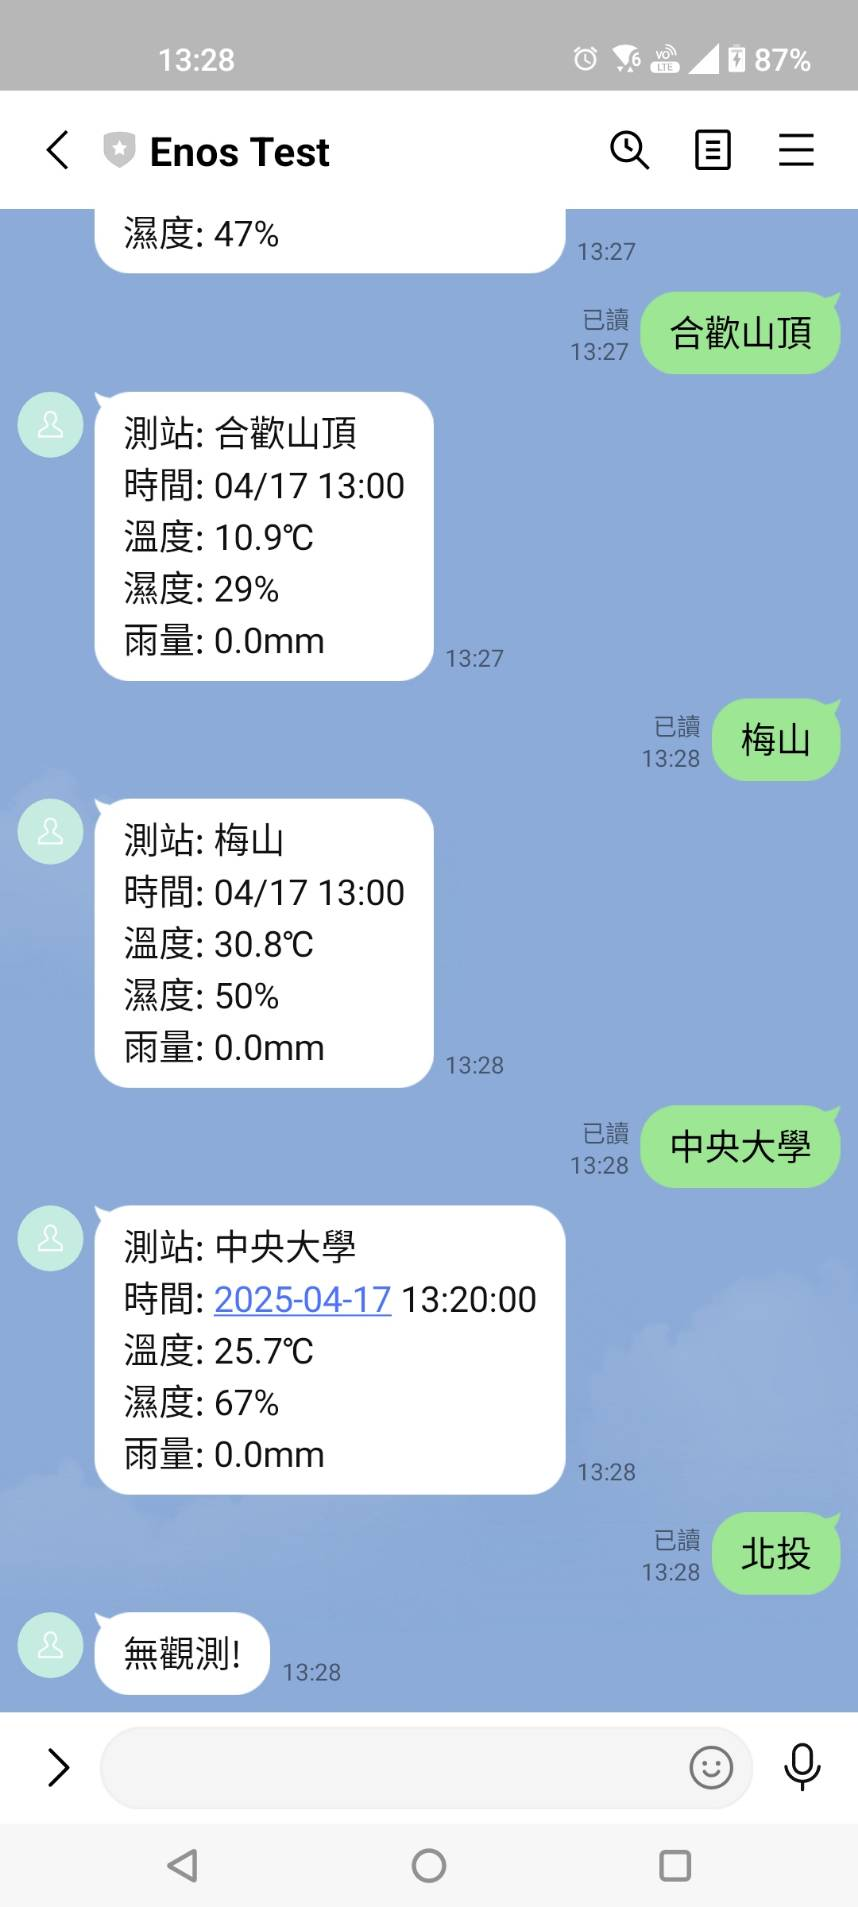
" width="120" alt="Weather LINE Bot 查詢照片">

<div style="page-break-before: always;"></div>

## <div id="wap"><font color="blue">9. Weather API</font></div>

### <font color="brown">整合即時天氣查詢模組，製作天氣查詢 API</font>

<b>Reference Output</b>

<tt>
\> curl --location 'https://weapi.enadv.online' --header 'Content-Type: application/json' --data '{"site": "苗栗"}'

測站: 苗栗, 時間: 07/03 11:00, 溫度: 31.1℃, 濕度: 68.0%, 雨量: 0.0mm
</tt>

<b>Hints</b>

<tt>
<ol>
    <li>refer to the usage of <font color="green">Flask</font> in LINE Bot
</ol>
</tt>

<div style="page-break-before: always;"></div>

## <div id="con"><font color="blue">10. Configurable Code Design</font></div>

### <font color="brown">查詢天氣 LINE Bot 能夠彈性指定各種 Keys</font>

<b>Hints</b>

<ol>
    <tt>
    <li><font color="green">dotenv</font> ft. INI<br>
        <br>
        <b>CONFIGURATION FILE NAME: <font color="blue">.env</font></b><br>
        <br>
        YOUR_KEY=CWA-...<br>
        YOUR_CHANNEL_ACCESS_TOKEN=...<br>
        YOUR_CHANNEL_SECRET=...<br>
        <br>
        <b>USAGE</b><br>
        <br>
        !pip install python-dotenv<br>
        <br>
        import os<br>
        from dotenv import load_dotenv<br>
        <br>
        load_dotenv()<br>
        key = os.environ.get('YOUR_KEY')<br>
        <br>
    <li><font color="green">json</font> ft. JSON<br>
        <br>
        <b>CONFIGURATION FILE NAME: <font color="blue">env.json</font></b><br>
        <br>
        {<br>
        &nbsp;&nbsp;&nbsp; "YOUR_KEY": "CWA-...",<br>
        &nbsp;&nbsp;&nbsp; "YOUR_CHANNEL_ACCESS_TOKEN": "...",<br>
        &nbsp;&nbsp;&nbsp; "YOUR_CHNNNEL_SECRET": "..."<br>
        }<br>
        <br>
        <b>USAGE</b><br>
        <br>
        import json<br>
        <br>
        with open('env.json') as f:<br>
        &nbsp;&nbsp;&nbsp; env = json.load(f)<br>
        key = env.get('YOUR_KEY')<br>
        <br>
    <li><font color="green">module</font> ft. Python<br>
        <br>
        <b>CONFIGURATION FILE NAME: <font color="blue">xxx.py</font></b><br>
        <br>
        YOUR_KEY = "CWA-..."<br>
        YOUR_CHANNEL_ACCESS_TOKEN = "..."<br>
        YOUR_CHANNEL_SECRET = "..."<br>
        <br>
        <b>USAGE</b><br>
        <br>
        from xxx import *<br>
        <br>
        key = YOUR_KEY<br>
        <br>
    <li><font color="green">default value design</font><br>
    </tt>
</ol>